In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy


Vizualization of Ginibre eigenvalues and Saturn effect


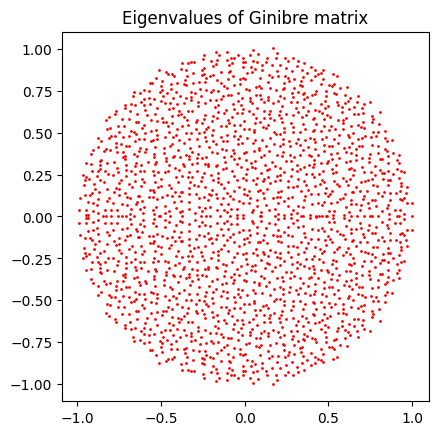

In [2]:
print("Vizualization of Ginibre eigenvalues and Saturn effect")
gen = rd.default_rng()
N = 2000
mu = 0.0
sigma = 1.0/np.sqrt(1*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) #+gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    #plt.xlim(-1.0,1.0)
    #plt.ylim(-1.0,1.0)
    return eigenvalues

eigenvalues = []
eigenvalues.append(obtainGinibreEig(N,mu,sigma))
    
#print(eigenvalues)
values = np.append([], eigenvalues)
'''print(values)
print(values.real)
print(values.imag)
'''
plt.gca().set_aspect('equal')
plt.scatter(values.real, values.imag, s = 1,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()

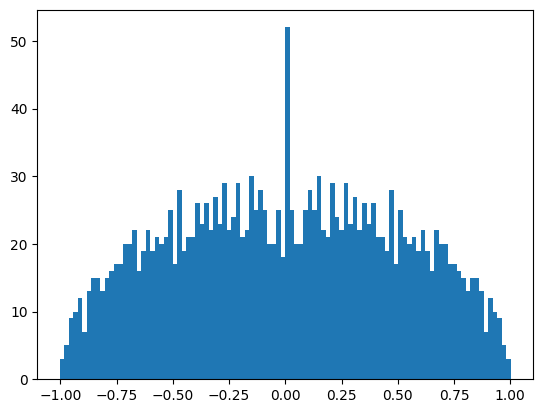

In [3]:
plt.hist(values.imag, 100);

Vizualization of Ginibre eigenvalues and Saturn effect


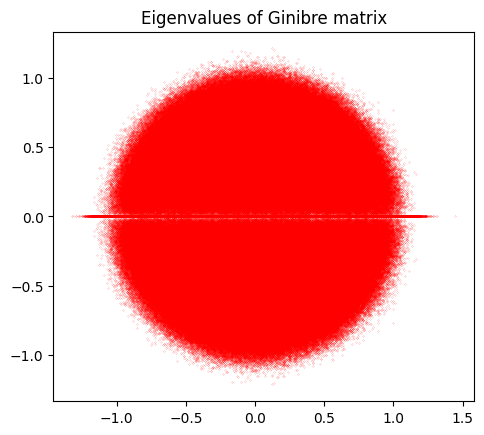

In [4]:
print("Vizualization of Ginibre eigenvalues and Saturn effect")
gen = rd.default_rng()
N = 64
mu = 0.0
sigma = 1.0/np.sqrt(1*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) #+gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    #plt.xlim(-1.2,1.2)
    #plt.ylim(-1.2,1.2)
    return eigenvalues

eigenvalues = []
for _ in range(10000):
    M = obtainGinibreEig(N,mu,sigma)
    eigenvalues.append(M)
    
#print(eigenvalues)
values = np.append([], eigenvalues)
'''print(values)
print(values.real)
print(values.imag)
'''
plt.gca().set_aspect('equal')
plt.scatter(values.real, values.imag, s = 0.01,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()

In [5]:
"""values2 = []
for vp in values.imag:
    if vp > 0:
        values2.append(vp)
print(values2)"""

valuesUP = values[values.imag>0].imag


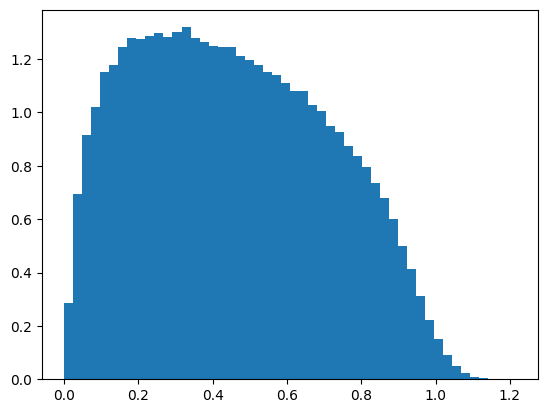

In [27]:
plt.hist(valuesUP, 50, density = True);#or valuesUP
# essayer de comparer avec une loi gamma ou de Rayleigh

#### Does this distribution converge to a half gaussian ? and at what speed if it does ?

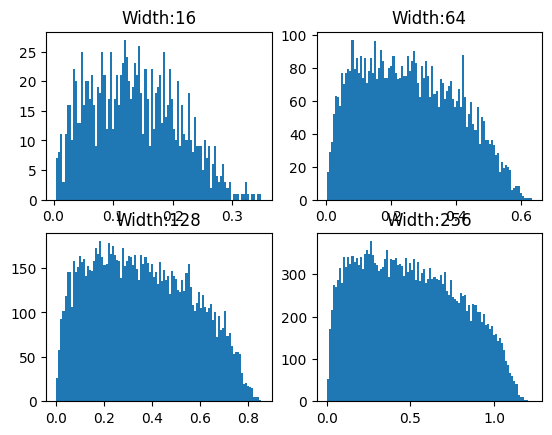

In [7]:
#W = 64
#N = 100
def ginOE_eigen(W,N):
    mu = 0.0
    sigma = 1.0/np.sqrt(1*N)
    eigenvalues=[]
    for _ in range(N):
        M = obtainGinibreEig(W,mu,sigma)
        eigenvalues.append(M)
    values = np.append([], eigenvalues)
    return values
    
fig, axs = plt.subplots(2, 2)
params = [(16,200),(64,200),(128,200),(256,200)]
for i in range(2):
    for j in range(2):
        W,N = params[i*2+j]
        eig = ginOE_eigen(W,N)
        values = eig[eig.imag>0].imag
        axs[i,j].hist(values, 100); #TODO: "normalize" so that we can compare correctly
        axs[i,j].set_title("Width:"+str(W))


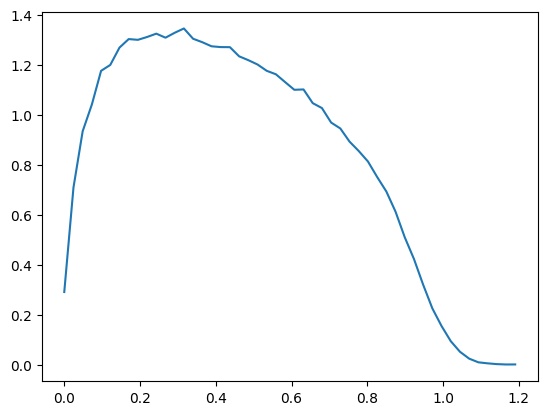

In [8]:
bins = 50
yUP, xUP = np.histogram(valuesUP, bins = bins)
xUP = xUP[:-1]
int = 0
for  i in yUP:
    int += i*np.max(xUP)/bins
plt.plot(xUP,yUP/int)


In [9]:
def f(t, y):
    σ = y[0]
    dσ = y[1]
    dy0 = dσ
    dy1 = -2/t * np.sqrt(max((σ-t*dσ)*(t*dσ - σ + (dσ)**2), 0))
    dy2 = σ/t
    return np.array([dy0, dy1, dy2])

t0 = 1e-15
tf = 9


In [10]:
y0_0 = -t0/np.pi-(t0/np.pi)**2
y0_1 = -1/np.pi-2*t0/np.pi
y0_2 = -t0/np.pi-t0**2/(2*np.pi**2)
y0 = np.array([y0_0, y0_1, y0_2])


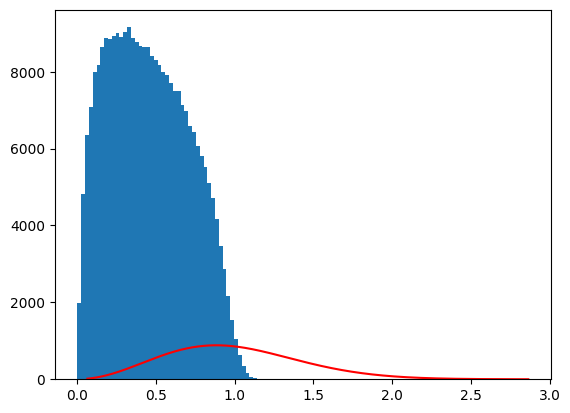

In [11]:
sol = solve_ivp(f, (t0, tf) ,y0, max_step=.001)
σ = sol.y[0][100:]
dσ = sol.y[1][100:]
I = sol.y[2][100:]
t = sol.t[100:]
x = t/np.pi

E = np.exp(I)
p = E/x**2 * (σ**2 + x*np.pi*dσ - σ)

plt.hist(valuesUP, 50)
plt.plot(x[100:], 950*p[100:], color = 'red')


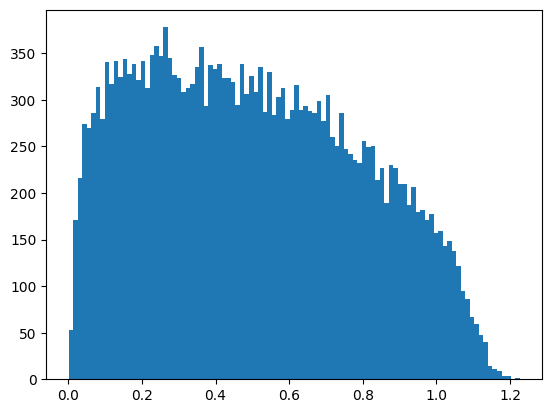

In [12]:
plt.hist(values.real, 100)
ecart = np.max(values.real) - np.min(values.real)
#essayer de comparer avec une gaussienne ou une loi de wigner

In [13]:
### Histogramme des données
bins = 100
y, x = np.histogram(values.real, bins = bins)
# Milieu de chaque classe
x = (x + np.roll(x, -1))[:-1] / 2.0


int = 0
for i in range(bins):
    int += y[i]*ecart/bins

In [14]:
dist_name = "norm"

# Paramètres de la loi
dist = getattr(scipy.stats, dist_name)

# Modéliser la loi
param = dist.fit(values.real)
print(param)

(0.4999839095907554, 0.2915892183962826)


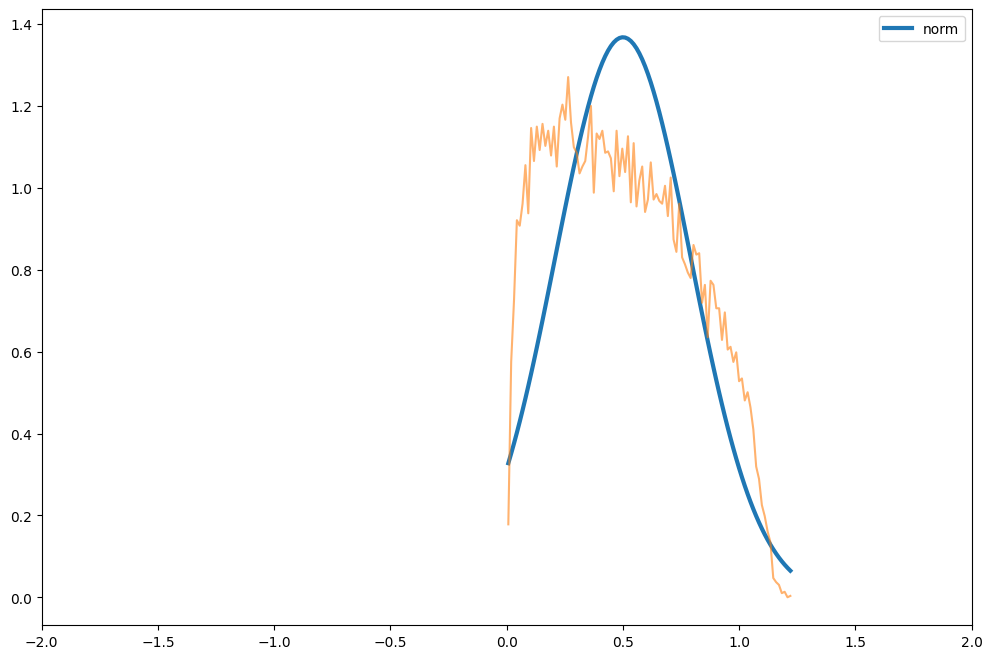

In [15]:
loc = param[-2]
scale = param[-1]
arg = param[:-2]

pdf = dist.pdf(x, loc=loc, scale=scale, *arg)

plt.figure(figsize=(12,8))
plt.plot(x, pdf, label=dist_name, linewidth=3) 
plt.plot(x, y/int, alpha=0.6)
plt.xlim(-2,2)
plt.legend()
plt.show()

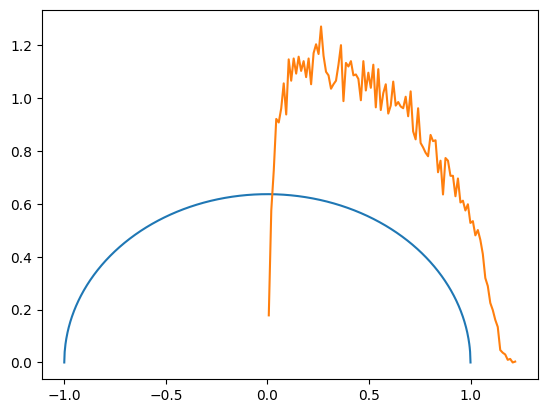

In [16]:
#demicercle ok sauf sur les bords, à comparer avec les GinUE
R = 1
def wigner(x):
    if np.abs(x) < R:
        return np.sqrt(R**2 - x**2)/(2*np.pi*R**2)
    else: return(0)

X = np.linspace(-1,1,1000)
Y = [wigner(x)*4 for x in X]
plt.plot(X,Y)
plt.plot(x,y/int)

Vizualization of Ginibre eigenvalues and Saturn effect
[array([ 0.72398223+0.8879155j ,  0.13161063-1.05193701j,
       -0.23552708-0.94997008j,  0.96256312+0.04896919j,
        0.87399321-0.30483471j,  0.76794441-0.51023328j,
        0.48420505-0.76225533j, -0.39169238+0.91253018j,
        0.43766502+0.80244587j,  0.81957939+0.28407269j,
        0.74248596+0.45696849j,  0.14239972+0.89472634j,
       -0.61654878+0.72944583j, -0.83722568-0.49172491j,
       -0.19023584+0.88622079j,  0.59233559+0.49326966j,
       -0.83234956+0.28438989j,  0.02296305-0.79165072j,
        0.2955037 -0.69291392j,  0.63764544-0.36054832j,
        0.67051186-0.10439519j,  0.52019608-0.45439303j,
       -0.30431631-0.72202514j, -0.71001433-0.37164538j,
       -0.82020072+0.16158429j, -0.80602389-0.01712103j,
        0.50826289+0.45001562j,  0.17472214+0.66419481j,
       -0.19872341+0.6796367j , -0.35643487+0.61539821j,
       -0.61001734+0.40698779j, -0.41705265-0.6121776j ,
       -0.71751399+0.10039925j, 

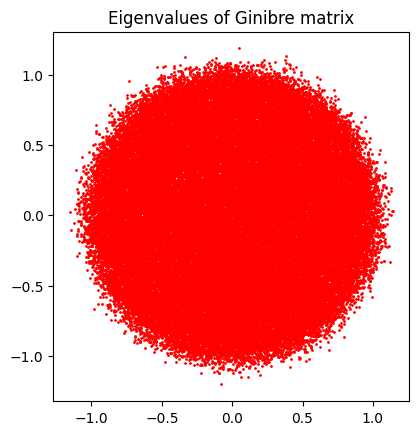

In [17]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

print("Vizualization of Ginibre eigenvalues and Saturn effect")
gen = rd.default_rng()
N = 64
mu = 0.0
sigma = 1.0/np.sqrt(2*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) +gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    #plt.xlim(-1.0,1.0)
    #plt.ylim(-1.0,1.0)
    return eigenvalues

eigenvalues = []
for _ in range(1000):
    eigenvalues.append(obtainGinibreEig(N,mu,sigma))
    
print(eigenvalues)
values2 = np.append([], eigenvalues)
print(values2)

plt.gca().set_aspect('equal')
plt.scatter(values2.real, values2.imag, s = 1,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()


(array([  2.,   2.,  22.,  18.,  55.,  82., 107., 162., 230., 273., 334.,
        389., 441., 530., 531., 551., 589., 618., 614., 597., 732., 724.,
        723., 768., 734., 776., 780., 747., 793., 831., 820., 832., 848.,
        868., 903., 844., 904., 854., 961., 906., 904., 890., 932., 913.,
        940., 947., 926., 941., 960., 997., 895., 926., 918., 907., 913.,
        920., 966., 876., 894., 937., 951., 896., 870., 875., 896., 897.,
        871., 837., 814., 856., 874., 814., 793., 779., 757., 756., 756.,
        746., 712., 706., 672., 648., 615., 598., 599., 538., 505., 451.,
        431., 353., 285., 268., 209., 133., 102.,  70.,  33.,  22.,   9.,
          6.]),
 array([-1.1559309 , -1.13294046, -1.10995003, -1.08695959, -1.06396916,
        -1.04097872, -1.01798829, -0.99499785, -0.97200741, -0.94901698,
        -0.92602654, -0.90303611, -0.88004567, -0.85705524, -0.8340648 ,
        -0.81107437, -0.78808393, -0.7650935 , -0.74210306, -0.71911263,
        -0.69612219, -0.67

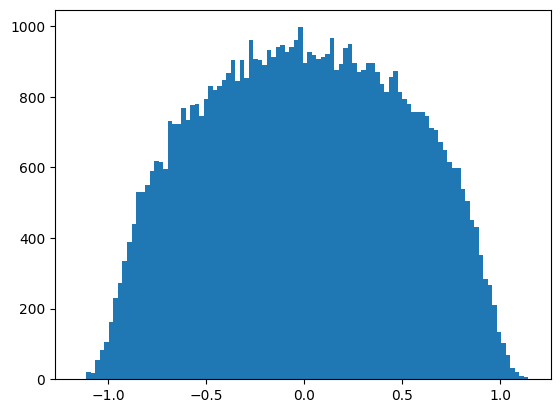

In [18]:
plt.hist(values2.real, 100)

In [19]:
bins = 100
y, x = np.histogram(values2.real, bins = bins)
# Milieu de chaque classe
x = x[:-1]


ecart = np.max(values2.real) - np.min(values2.real)
int = 0
for i in range(bins):
    int += y[i]*ecart/bins

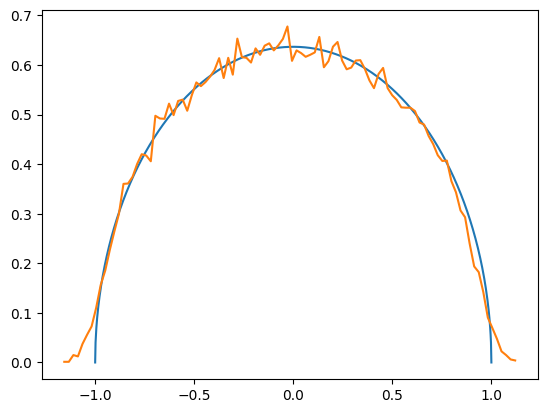

In [20]:
#demicercle ok sauf sur les bords, à comparer avec les GinUE
R = 1
def wigner(x):
    if np.abs(x) < R:
        return np.sqrt(R**2 - x**2)/(2*np.pi*R**2)
    else: return(0)

X = np.linspace(-1,1,1000)
Y = [wigner(x)*4 for x in X]
plt.plot(X,Y)
plt.plot(x,y/int)

In [21]:
bins = 100
y, x = np.histogram(values2.imag, bins = bins)
# Milieu de chaque classe
x = x[:-1]


ecart = np.max(values2.real) - np.min(values2.real)
int = 0
for i in range(bins):
    int += y[i]*ecart/bins

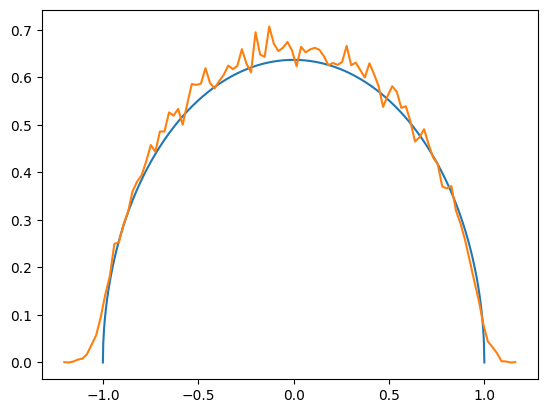

In [22]:
#demicercle ok sauf sur les bords, à comparer avec les GinUE
R = 1
def wigner(x):
    if np.abs(x) < R:
        return np.sqrt(R**2 - x**2)/(2*np.pi*R**2)
    else: return(0)

X = np.linspace(-1,1,1000)
Y = [wigner(x)*4 for x in X]
plt.plot(X,Y)
plt.plot(x,y/int)

In [23]:
def rayleigh(x,sisquare):
    return np.exp(-2*x**2/sisquare)*x/sisquare

sisquare = 1
Xr = np.linspace(0,10,1000)
Yr = [rayleigh(x, sisquare)*4 for x in X]

[1977 4823 6357 7086 8002 8163 8635 8867 8847 8924 9015 8905 9039 9156
 8876 8782 8671 8649 8647 8398 8293 8175 8003 7908 7695 7486 7495 7122
 6988 6593 6432 6074 5818 5533 5111 4715 4165 3468 2877 2176 1530 1050
  638  349  162   62   34   13    3    4]


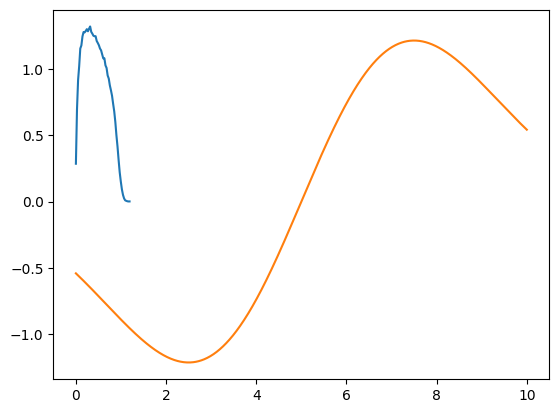

In [24]:
bins = 50
yUP, xUP = np.histogram(valuesUP, bins = bins)

int = 0
for  i in yUP:
    int += i*np.max(xUP)/bins
print(yUP)
xUP = xUP[:-1]
plt.plot(xUP,yUP/int)
plt.plot(Xr,Yr)

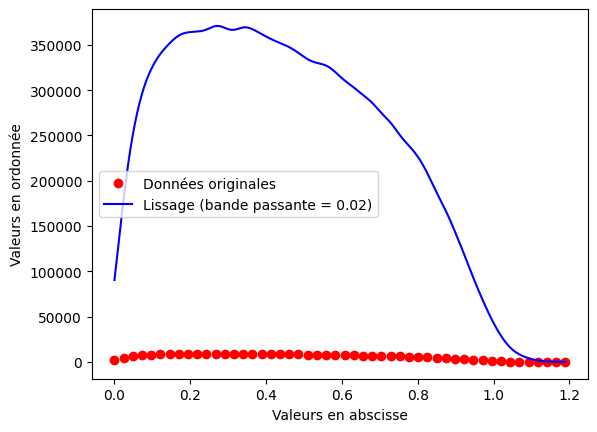

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Données fournies
x_values = np.array([3.58731079e-04, 2.46247676e-02, 4.88908040e-02, 7.31568405e-02,
                     9.74228770e-02, 1.21688914e-01, 1.45954950e-01, 1.70220986e-01,
                     1.94487023e-01, 2.18753059e-01, 2.43019096e-01, 2.67285132e-01,
                     2.91551169e-01, 3.15817205e-01, 3.40083242e-01, 3.64349278e-01,
                     3.88615315e-01, 4.12881351e-01, 4.37147388e-01, 4.61413424e-01,
                     4.85679461e-01, 5.09945497e-01, 5.34211534e-01, 5.58477570e-01,
                     5.82743607e-01, 6.07009643e-01, 6.31275680e-01, 6.55541716e-01,
                     6.79807753e-01, 7.04073789e-01, 7.28339826e-01, 7.52605862e-01,
                     7.76871899e-01, 8.01137935e-01, 8.25403972e-01, 8.49670008e-01,
                     8.73936045e-01, 8.98202081e-01, 9.22468117e-01, 9.46734154e-01,
                     9.71000190e-01, 9.95266227e-01, 1.01953226e+00, 1.04379830e+00,
                     1.06806434e+00, 1.09233037e+00, 1.11659641e+00, 1.14086245e+00,
                     1.16512848e+00, 1.18939452e+00])

y_values = np.array([1950, 4687, 6288, 7350, 7908, 8314, 8522, 8829, 8829, 8865, 8820, 9129, 8944, 8778,
                     9079, 8919, 8782, 8641, 8539, 8455, 8293, 8066, 7986, 8005, 7790, 7487, 7414, 7090,
                     7045, 6578, 6525, 6000, 5817, 5528, 5119, 4474, 4128, 3477, 2924, 2206, 1671, 1091,
                     675, 324, 185, 84, 29, 12, 6, 2])

# Lissage avec un noyau gaussien
def kernel_smooth(x, y, bandwidth=0.02):
    x_smooth = np.linspace(x.min(), x.max(), 1000)
    y_smooth = np.zeros_like(x_smooth)
    for xi, yi in zip(x, y):
        y_smooth += norm.pdf(x_smooth, xi, bandwidth) * yi
    return x_smooth, y_smooth

# Paramètre de bande passante
bandwidth = 0.02

# Application du lissage
x_smooth, y_smooth = kernel_smooth(x_values, y_values, bandwidth)

# Tracé des résultats
plt.plot(x_values, y_values, 'ro', label='Données originales')
plt.plot(x_smooth, y_smooth, 'b-', label=f'Lissage (bande passante = {bandwidth})')
plt.xlabel('Valeurs en abscisse')
plt.ylabel('Valeurs en ordonnée')
plt.legend()
plt.show()


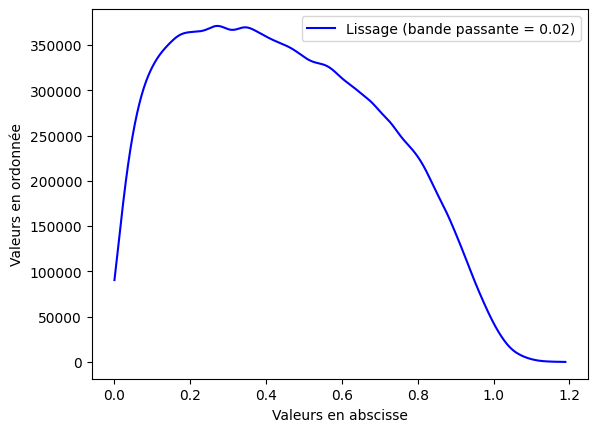

L'intégrale numérique de la courbe lissée est : 284105.9865259939


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import norm

# Données fournies
x_values = np.array([3.58731079e-04, 2.46247676e-02, 4.88908040e-02, 7.31568405e-02,
                     9.74228770e-02, 1.21688914e-01, 1.45954950e-01, 1.70220986e-01,
                     1.94487023e-01, 2.18753059e-01, 2.43019096e-01, 2.67285132e-01,
                     2.91551169e-01, 3.15817205e-01, 3.40083242e-01, 3.64349278e-01,
                     3.88615315e-01, 4.12881351e-01, 4.37147388e-01, 4.61413424e-01,
                     4.85679461e-01, 5.09945497e-01, 5.34211534e-01, 5.58477570e-01,
                     5.82743607e-01, 6.07009643e-01, 6.31275680e-01, 6.55541716e-01,
                     6.79807753e-01, 7.04073789e-01, 7.28339826e-01, 7.52605862e-01,
                     7.76871899e-01, 8.01137935e-01, 8.25403972e-01, 8.49670008e-01,
                     8.73936045e-01, 8.98202081e-01, 9.22468117e-01, 9.46734154e-01,
                     9.71000190e-01, 9.95266227e-01, 1.01953226e+00, 1.04379830e+00,
                     1.06806434e+00, 1.09233037e+00, 1.11659641e+00, 1.14086245e+00,
                     1.16512848e+00, 1.18939452e+00])

y_values = np.array([1950, 4687, 6288, 7350, 7908, 8314, 8522, 8829, 8829, 8865, 8820, 9129, 8944, 8778,
                     9079, 8919, 8782, 8641, 8539, 8455, 8293, 8066, 7986, 8005, 7790, 7487, 7414, 7090,
                     7045, 6578, 6525, 6000, 5817, 5528, 5119, 4474, 4128, 3477, 2924, 2206, 1671, 1091,
                     675, 324, 185, 84, 29, 12, 6, 2])

# Lissage avec un noyau gaussien
def kernel_smooth(x, y, bandwidth=0.02):
    x_smooth = np.linspace(x.min(), x.max(), 1000)
    y_smooth = np.zeros_like(x_smooth)
    for xi, yi in zip(x, y):
        y_smooth += norm.pdf(x_smooth, xi, bandwidth) * yi
    return x_smooth, y_smooth

# Paramètre de bande passante
bandwidth = 0.02

# Application du lissage
x_smooth, y_smooth = kernel_smooth(x_values, y_values, bandwidth)

# Calcul de l'intégrale numérique
integral = simps(y_smooth, x_smooth)

# Affichage des résultats
plt.plot(x_smooth, y_smooth, 'b-', label=f'Lissage (bande passante = {bandwidth})')
plt.xlabel('Valeurs en abscisse')
plt.ylabel('Valeurs en ordonnée')
plt.legend()
plt.show()

print(f"L'intégrale numérique de la courbe lissée est : {integral}")
